In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


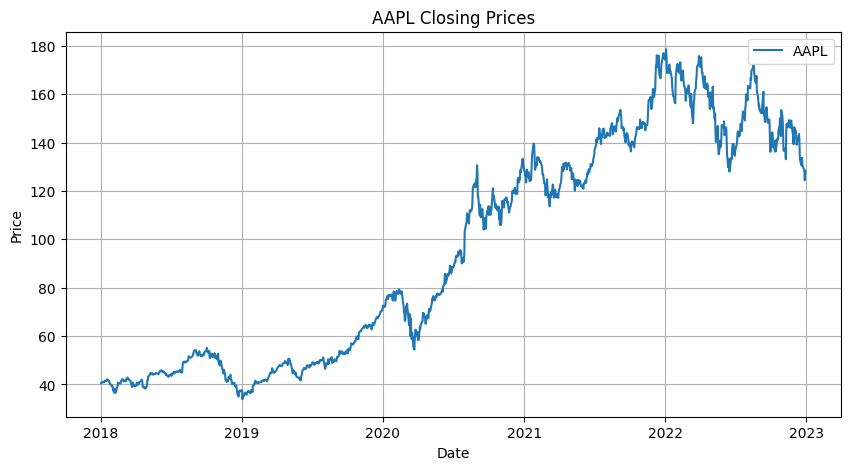

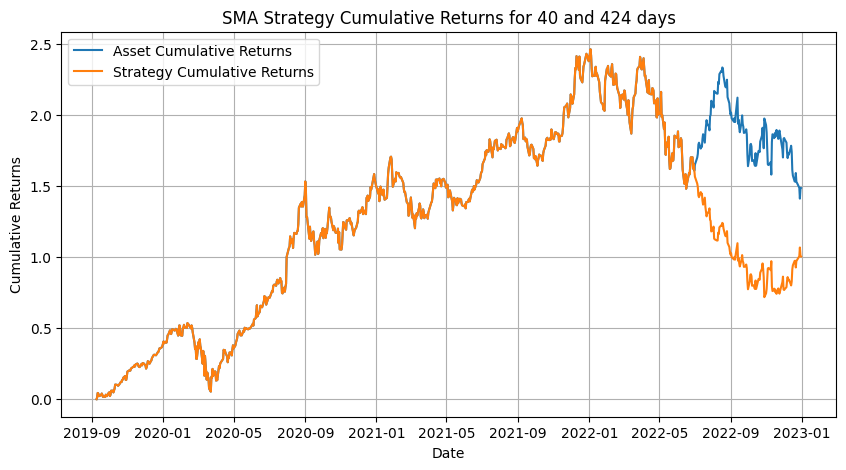

Price,Close,High,Low,Open,Volume,SMA1,SMA2,signal,asset_cumaulative_returns,strategy_cumulative_returns
Date,,,,,,,,,,
2019-09-09,51.628605,52.175820,50.881310,51.790117,109237600,49.672473,44.970812,-1.0,0.000000,0.000000
2019-09-10,52.238487,52.257773,51.035582,51.553867,127111600,49.746400,44.998670,1.0,0.011813,0.011813
2019-09-11,53.899410,53.928340,52.486777,52.568742,177158400,49.866112,45.030461,1.0,0.043983,0.043983
2019-09-12,53.778877,54.581619,53.723434,54.191098,128906800,49.989715,45.061526,1.0,0.041649,0.041649
2019-09-13,52.732658,53.224426,52.315619,53.033988,159053200,50.073294,45.089032,1.0,0.021385,0.021385
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.173813,130.726649,127.982200,129.245831,63814900,141.920585,148.791814,-1.0,1.521351,0.977556
2022-12-27,128.367188,129.729545,127.073942,129.699930,69007800,141.292420,148.790557,-1.0,1.486358,1.005002
2022-12-28,124.428215,129.354401,124.260391,128.011792,85438400,140.624915,148.774527,-1.0,1.410063,1.066526


In [ ]:


def get_data(ticker, start_date, end_date):
   "Fetch data from Yahoo Finance"
   df = yf.download(ticker, start=start_date, end=end_date)
   df.columns = df.columns.get_level_values(0)
   plt.figure(figsize=(10, 5))
   plt.plot(df['Close'], label=ticker)
   plt.title(f'{ticker} Closing Prices')
   plt.xlabel('Date')
   plt.ylabel('Price')
   plt.legend()
   plt.grid()
   plt.show()
   return df


def test_sma_sratergy(df, window, window_long):
   """based on the trading strategy based on technical analysis is using two simple moving
averages (SMAs). The idea is that the trader should go long on a stock (or financial
instrument in general) when the shorter-term SMA is above the longer-term SMA
and should go short when the opposite holds true."""
   df['SMA1'] = df['Close'].rolling(window=window).mean()
   df['SMA2'] = df['Close'].rolling(window=window_long).mean()
   df["signal"] = np.where(df["SMA1"] > df['SMA2'], 1, -1)
   df["signal"] = df["signal"].shift(1)  # Shift the signal to avoid lookahead bias
   # The signal is created by comparing the closing price to the SMA. If the closing price is greater than the SMA, the signal is 1 (buy), otherwise -1 (sell).
   # The signal is then shifted by one period to avoid lookahead bias, meaning that the signal for a given day is based on the previous day's data.
   df.dropna(subset=["SMA1"], inplace=True)
   df.dropna(subset=["SMA2"], inplace=True)
   df.dropna(subset=["signal"], inplace=True)

   returns = df['Close'].pct_change()
   df["asset_cumaulative_returns"] = np.cumprod(1 + returns.fillna(0)) - 1
    # Calculate cumulative returns of the asset by taking the percentage change of the closing prices and adding 1, then taking the cumulative product and subtracting 1.
    #cumalitive returns is calculated by taking the percentage change of the closing prices, adding 1, and then taking the cumulative product of these values.
    #  Finally, we subtract 1 to get the cumulative returns.
   strategy_returns = df['signal'] * returns     
   df["strategy_cumulative_returns"] = np.cumprod(1 + strategy_returns.fillna(0)) - 1
   plt.figure(figsize=(10, 5))
   plt.plot(df["asset_cumaulative_returns"], label='Asset Cumulative Returns')
   plt.plot(df["strategy_cumulative_returns"], label='Strategy Cumulative Returns')
   plt.title(f'SMA Strategy Cumulative Returns for {window} and {window_long} days')

   plt.xlabel('Date')
   plt.ylabel('Cumulative Returns')
   plt.legend()
   plt.grid() # display grid lines for better readability
   plt.show()
   return df
  
data = get_data("AAPL", "2018-01-01", "2023-01-01")
test_sma_sratergy(data, window=40, window_long=424)